## Import 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as scio
import os
import mne
import pickle

import pac


## Parameter

In [6]:
list_files_path_name = pd.read_csv('../task_track_files/task_track_file_matlab.csv',usecols=['local_file_path','preprocessed_one','ERP_npy_file','ERP_nobaseline_npy_file'])
num_task_file = list_files_path_name.shape[0]
list_files_path_name
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
montage = mne.channels.read_custom_montage('Standard-10-20-Cap81.locs')
dict_temp={'S200':5,'S201':6,'S202':7}
ERP = {'S200':[],'S201':[],'S202':[]}


## ERP Test with out channel normalization
### Calculation on Pre of Kiani

In [9]:
ERP_kiani_pre = np.zeros([3,63,601],dtype=np.float64)

EEG = mne.io.read_raw_eeglab('..\data\pre_sub-001_ses-01_task-Rest_eeg_k.set',eog=(),preload=True)

EEG.drop_channels(['VEOG'])

events, event_dict = mne.events_from_annotations(EEG, verbose=0)
t  = events[events[:,2]==5]
# t1 = mne.pick_events(events,include=[5])
t2 = {'S200':5}
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0)
ERP['S200'] = pochs_1['S200'].average().to_data_frame()
del ERP['S200']['time']
ERP_kiani_pre[0,:,:] = np.transpose(ERP['S200'].to_numpy())

t  = events[events[:,2]==6]
t2 = {'S201':6}
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0) 
ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
del ERP['S201']['time']
ERP_kiani_pre[1,:,:] = np.transpose(ERP['S201'].to_numpy())

t  = events[events[:,2]==7]
t2 = {'S202':7}               
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=-0.2, tmax=1, baseline=(-0.2,0),preload=True, verbose=0)  
ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
del ERP['S202']['time']
ERP_kiani_pre[2,:,:] = np.transpose(ERP['S202'].to_numpy())





Reading d:\Mastersharif\MasterProject\Working_with_kiani\git\parkinson-pac\data\pre_sub-001_ses-01_task-Rest_eeg_k.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...


C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13172/3812406619.py:3: RuntimeWarning: Data file name in EEG.data (pre_sub-001_ses-01_task-Rest_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (pre_sub-001_ses-01_task-Rest_eeg_k.fdt).
  EEG = mne.io.read_raw_eeglab('..\data\pre_sub-001_ses-01_task-Rest_eeg_k.set',eog=(),preload=True)
C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13172/3812406619.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab('..\data\pre_sub-001_ses-01_task-Rest_eeg_k.set',eog=(),preload=True)


### Calculation on Pre of mine

In [10]:
i=0
Path_to_load_file = os.path.join(Path,list_files_path_name['local_file_path'][i],list_files_path_name['preprocessed_one'][i])
EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)


ERP_mine_pre = np.zeros([3,63,601],dtype=np.float64)
events, event_dict = mne.events_from_annotations(EEG, verbose=0)
t  = events[events[:,2]==5]
# t1 = mne.pick_events(events,include=[5])
t2 = {'S200':5}
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0)
ERP['S200'] = pochs_1['S200'].average().to_data_frame()
del ERP['S200']['time']
ERP_mine_pre[0,:,:] = np.transpose(ERP['S200'].to_numpy())

t  = events[events[:,2]==6]
t2 = {'S201':6}
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=0.250, tmax=1.450, baseline=(0.250,0.450),preload=True, verbose=0) 
ERP['S201'] = pochs_1['S201'].average().to_data_frame() 
del ERP['S201']['time']
ERP_mine_pre[1,:,:] = np.transpose(ERP['S201'].to_numpy())

t  = events[events[:,2]==7]
t2 = {'S202':7}               
pochs_1 = mne.Epochs(EEG,events=t,event_id=t2,
                tmin=-0.2, tmax=1, baseline=(-0.2,0),preload=True, verbose=0)  
ERP['S202'] = pochs_1['S202'].average().to_data_frame() 
del ERP['S202']['time']
ERP_mine_pre[2,:,:] = np.transpose(ERP['S202'].to_numpy())





Reading D:\Mastersharif\MasterProject\data\parkinsons-oddball\sub-001\ses-01\eeg\pre_sub-001_ses-01_task-Rest_eeg.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...


C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13172/621810818.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(Path_to_load_file,eog=(),preload=True)


### Plot to compare

(63, 601)


3.432893060804911

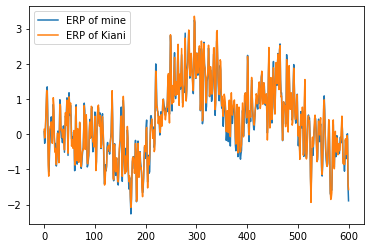

In [12]:
Stimuli = ['S200','S201','S202']
Trials = np.load('..\data\sub-001_ses-01_task-Rest_epochs.npz')

Group_num = 0
Subject_num = 0
Stimulus_num = 2
Channel_num = 2

ERP = np.mean(Trials[Stimuli[Stimulus_num]],axis=0)
print(ERP.shape)


temp = ERP_mine_pre[Stimulus_num,Channel_num,:]
vmax = np.max(temp)
vmin = np.min(temp)
temp_norm = (temp-vmin)/(vmax-vmin)
# plt.plot(temp_norm)
plt.plot(temp)

temp1 = ERP_kiani_pre[Stimulus_num,Channel_num,:]
# temp1 = ERP[0,Subject_num,Stimulus_num,0,Channel_num,:]
vmax = np.max(temp1)
vmin = np.min(temp1)
temp1_norm = (temp1-vmin)/(vmax-vmin)
# plt.plot(temp1_norm)
plt.plot(temp1)

plt.legend(['ERP of mine','ERP of Kiani'])


np.linalg.norm(temp1-temp)

In [14]:
ERP_mine_pre.shape
ERP_kiani_pre.shape

(3, 63, 601)

## PAC test
### for just one subject


In [20]:
High_fre = 30
Low_fre = 6
PAC_mine = np.zeros([3,63])
PAC_kiani = np.zeros([3,63])
for i in np.arange(3):
    for ch in np.arange(63):
        PAC_mine[i,ch] = pac.tfMVL(ERP_mine_pre[i,ch,:],high_freq=[High_fre,High_fre],low_freq=[Low_fre,Low_fre],Fs=500) 
        PAC_kiani[i,ch] = pac.tfMVL(ERP_kiani_pre[i,ch,:],high_freq=[High_fre,High_fre],low_freq=[Low_fre,Low_fre],Fs=500)
         
       

In [31]:
with open('..\data\channels_name.pkl', 'rb') as f:
        channels_name = pickle.load(f)
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return channels_name[tick_number]

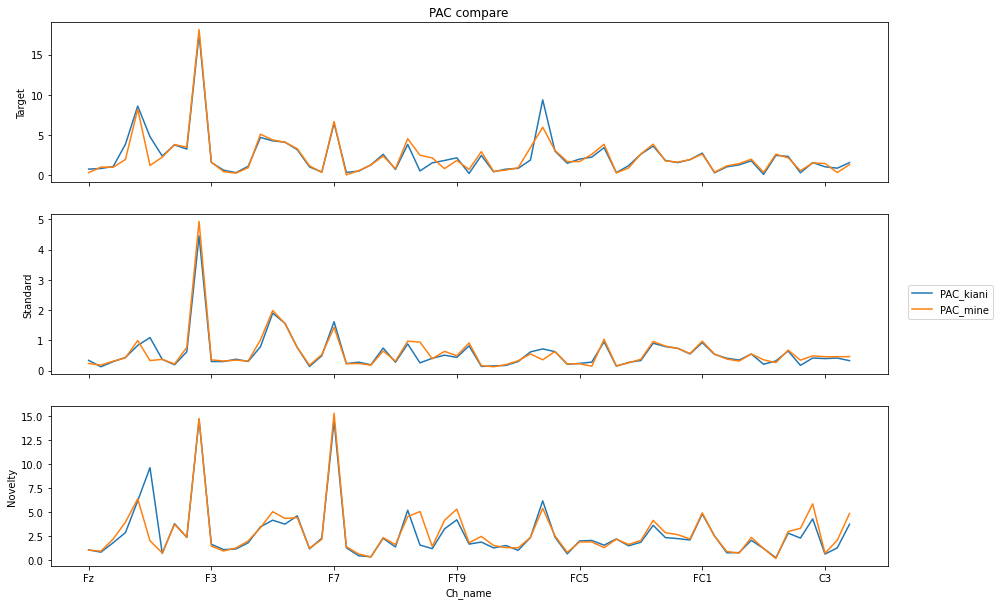

In [32]:
Stimuli_name = ['Target','Standard','Novelty']

select_channels = {'PAC_mine','PAC_kiani'}

colors = ['r','g']

NUM_COLORS = 4

cm = plt.get_cmap('viridis')

num_sti = 0

fig, axes = plt.subplots(3,1,sharex=True,figsize=(15, 10))
times = np.linspace(-200,1000,601)
for i in np.arange(3):
    axes[i].plot(PAC_kiani[i,:])
    axes[i].plot(PAC_mine[i,:])
    axes[i].set_ylabel(Stimuli_name[i])

# ax[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axes[0].set_title(f'PAC compare')
axes[2].set_xlabel('Ch_name')
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig.legend(select_channels,loc='center right')



### Check PAC for all subjects

(3, 25, 3, 63)
(3, 25, 3, 63)


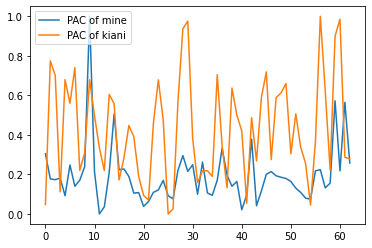

In [29]:
My_PAC = '..\data\PAC_allsubjects_electordes_-200_1000_pair_fre_30_6_nb_False.npy'
PAC_of_kiani = '..\data\mvls2d_not_normalized.npz'

Group_num = 2
Subject_num = 0
Stimulus_num = 2


PAC_array_Mine = np.load(My_PAC)
PAC_array_Kiani = np.load(PAC_of_kiani)
PAC_array_Kiani = PAC_array_Kiani['mvl_2ds']

PAC_array_Kiani = PAC_array_Kiani[:,:,:,:,10,2]
print(PAC_array_Kiani.shape)

print(PAC_array_Mine.shape)



temp = PAC_array_Mine[Group_num,Subject_num,Stimulus_num,:]
vmax = np.max(temp)
vmin = np.min(temp)
temp_norm = (temp-vmin)/(vmax-vmin)
plt.plot(temp_norm)
# plt.plot(temp)

temp1 = PAC_array_Kiani[Group_num,Subject_num,Stimulus_num,:]
# temp1 = ERP[0,Subject_num,Stimulus_num,0,Channel_num,:]
vmax = np.max(temp1)
vmin = np.min(temp1)
temp1_norm = (temp1-vmin)/(vmax-vmin)
plt.plot(temp1_norm)
# plt.plot(temp1)

plt.legend(['PAC of mine', 'PAC of kiani'])





### Check my erp of channel normalization with that of Kiani

In [3]:
list_tasks_info = pd.read_csv('../task_track_files/task_track_file_matlab.csv',usecols=['local_file_path','ERP_npy_file','ERP_npy_file_with_normalization_and_baseline_correction','ERP_nobaseline_npy_file','Group_file_type'])
num_task_file = list_tasks_info.shape[0]
print(num_task_file)
list_tasks_info
nobaseline = True

75


In [4]:
Path = 'D:\Mastersharif\MasterProject\data\parkinsons-oddball'
nobaseline = False
ERP_collection = np.zeros([3,25,3,63,601])
list_tasks_info.shape[0]
counter_PD_on = 0
counter_PD_off = 0
counter_CTL = 0
for i in np.arange(num_task_file):
    Path_to_save_file = os.path.join(Path,list_tasks_info['local_file_path'][i],list_tasks_info['ERP_npy_file_with_normalization_and_baseline_correction'][i])
    ERP_array = np.load(Path_to_save_file)
    if list_tasks_info['Group_file_type'][i] == 'PD_ON':
        ERP_collection[0,counter_PD_on,:,:,:] = ERP_array
        counter_PD_on = counter_PD_on + 1
    elif list_tasks_info['Group_file_type'][i] == 'PD_OFF':
        ERP_collection[1,counter_PD_off,:,:,:] = ERP_array
        counter_PD_off = counter_PD_off + 1
    elif list_tasks_info['Group_file_type'][i] == 'CTL':
        ERP_collection[2,counter_CTL,:,:,:] = ERP_array
        counter_CTL = counter_CTL + 1

0.14686037562007503

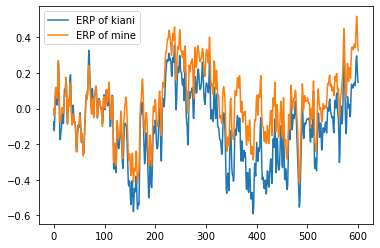

In [16]:
a = np.load('../data/epochs.npz')
b = a['epochs']
b.shape


Group_num = 2
Subject_num = 0
Stimulus_num = 0
Channel_num = 34




temp = b[Group_num,Subject_num,Stimulus_num,0,Channel_num,:]
vmax = np.max(temp)
vmin = np.min(temp)
temp_norm = (temp-vmin)/(vmax-vmin)
# plt.plot(temp_norm)
plt.plot(temp)

temp1 = ERP_collection[Group_num,Subject_num,Stimulus_num,Channel_num,:]
# temp1 = ERP[0,Subject_num,Stimulus_num,0,Channel_num,:]
vmax = np.max(temp1)
vmin = np.min(temp1)
temp1_norm = (temp1-vmin)/(vmax-vmin)
# plt.plot(temp1_norm)
plt.plot(temp1)

plt.legend(['ERP of kiani','ERP of mine'])


np.linalg.norm(temp1-temp)/np.linalg.norm(temp1)/np.linalg.norm(temp)
